# Jakobshavn CHANGES

The goals of this tutorial are:
1. create an elevation compilation for Jakobshavn Isbrae
2. create an ice speed compilation for Jakobshavn Isbrae
3. plot Jakobshavn's elevation and speed


## Initializing the GreenlandCHANGES class

To initialize the module from any directory, first add the package to your path:

In [1]:
import sys
# sys.path.insert(0, "[your path here]")
sys.path.insert(0, "/Applications/anaconda3/envs/changes/lib/python3.8/site-packages/GreenlandCHANGES")

Next, define two directories on your local drive as follows:

| directory | purpose | approximate file size |
|-----------|---------|-----------------------|
|`project_folder` | This is the path where output data from the changes module will be stored - the data to be used directly for analysis. | The file sizes for this path can be up to a few GB depending on the size and resolution of the sample domain, and the number of sources accessed. |
|`data_folder` | This is the path where ice velocity and elevation data, from their respective sources, will be stored. The data_folder option was create facilitate data storage on external drives. | Depending on the data source and whether raw data is kept on disk, this can be several hundreds of GB. |

In [2]:
project_folder = '/Users/michwood/Documents/Research/Projects/Greenland Dynamics/Tmp'
data_folder='/Volumes/mhwood/Research/Data Repository/Greenland'

Next, initialize the GlacierCHANGES object - this object will contain all pertinent information to initialize the data grids in your region of interest.

In [3]:
from GreenlandCHANGES import init_object
GC = init_object.GreenlandCHANGES(project_folder,data_folder)

To view the initial attributes in the `GC` class, use the method `print_initiation_parameters`:

In [4]:
GC.print_initiation_parameters()

Region Parameters:
    region_initiated:  False
    region_name:  untitled_region
    extents:  []
 
Velocity Parameters:
    compile_velocity:  True
    velocity_grid_posting:  300
    velocity_grid_epsg:  3413
    create_velocity_stacks:  True
    Velocity Sources:
        compile_golive_data: True
        compile_measures_insar_data: True
        compile_measure_optical_data: True
        compile_measures_quarterly_mosaic_data: True
        compile_measures_multiyear_mosaic_data: True
 
Elevation Parameters:
    compile_elevation:  True
    elevation_grid_posting:  50
    elevation_grid_epsg:  3413
    create_elevation_stacks:  True
    overwrite_existing_elevation_stacks:  True
    Elevation Sources:
        compile_arcticDEM_data: True
        compile_cryosat2_data: True
        compile_gimp_data: True
        compile_glistin_data: True
        compile_icebridge_atm_data: True
        compile_icebridge_lvis_data: True
        compile_icesat_data: True
        compile_icesat2_data:

There are a few things to note for the initial parameters:
1. The region has not yet been initiated
2. The default parameters for velocity and elevation are all "True". In other words, the module, by default, will attempt to download ALL available velocity and elevation.
In the next steps, we will adjust these modules to our needs

**When all of the parameters have been set correctly, the module will be ready to run using the the `execute_velocity_and_elevation_compilations` method**

## Defining the region of interest

First, try to run the execute_velocity_and_elevation_compilations method without specifying the region and its extents:

In [5]:
GC.execute_velocity_and_elevation_compilations()

!! Alert !!
!! Please define a region name and valid extents before running the compilation !!
   There are two options:
   Option 1: Pre-defined glacier extent:
      GC.set_extents_by_glacier([glacier name here])
   Option 2: Custom region and extents:
      GC.region_name = [your region here]
      GC.extents = [min_x,min_y,max_x,max_y]


Here, we get an alert indicating that the region has not yet been defined - the module does not yet know where to look for available ice velocity and elevation data.

#### Defining the region and its extents

For this example, we will use the area around the fast-flowing outlet of Jakobshavn Isbrae. In this case, the extents of the class are set by accessing and editing the `region_name` and `extents` attributes. Here, we also elect to output the grid at a 100m posting.

In [6]:
GC.region_name = 'Jakobshavn'
min_x = -187000
min_y = -2295000
max_x = -142000
max_y = -2265000
GC.extents = [min_x, min_y, max_x, max_y] #note the order of the extents
GC.elevation_grid_posting = 100
GC.velocity_grid_posting = 100

Note that the current version of this package only supports coordinates in polar stereographic coordinates.

Using the `print_initiation_parameters` method again shows the changes to the class:

In [7]:
GC.print_initiation_parameters()

Region Parameters:
    region_initiated:  True
    region_name:  Jakobshavn
    extents:  [-187000, -2295000, -142000, -2265000]
 
Velocity Parameters:
    compile_velocity:  True
    velocity_grid_posting:  100
    velocity_grid_epsg:  3413
    create_velocity_stacks:  True
    Velocity Sources:
        compile_golive_data: True
        compile_measures_insar_data: True
        compile_measure_optical_data: True
        compile_measures_quarterly_mosaic_data: True
        compile_measures_multiyear_mosaic_data: True
 
Elevation Parameters:
    compile_elevation:  True
    elevation_grid_posting:  100
    elevation_grid_epsg:  3413
    create_elevation_stacks:  True
    overwrite_existing_elevation_stacks:  True
    Elevation Sources:
        compile_arcticDEM_data: True
        compile_cryosat2_data: True
        compile_gimp_data: True
        compile_glistin_data: True
        compile_icebridge_atm_data: True
        compile_icebridge_lvis_data: True
        compile_icesat_data: Tru

## Objective 1: A timeseries of elevation

For this example, we will demonstrate how to use the `changes` module to obtain GLISTIN-A data from [PO.DAAC](https://podaac.jpl.nasa.gov).

As we saw in the notes above, all velocity and elevation sources will be run by default. To run the routine for the GLISTIN data only, we turn off all other sources as follows:

In [8]:
GC.deactivate_all_sources()
GC.compile_elevation = True
GC.compile_glistin_data = True

We can check that the run parameters are stored as expected by calling the `print_initiation_parameters` method:

In [9]:
GC.print_initiation_parameters()

Region Parameters:
    region_initiated:  True
    region_name:  Jakobshavn
    extents:  [-187000, -2295000, -142000, -2265000]
 
Velocity Parameters:
    compile_velocity:  False
 
Elevation Parameters:
    compile_elevation:  True
    elevation_grid_posting:  100
    elevation_grid_epsg:  3413
    create_elevation_stacks:  True
    overwrite_existing_elevation_stacks:  True
    Elevation Sources:
        compile_arcticDEM_data: False
        compile_cryosat2_data: False
        compile_gimp_data: False
        compile_glistin_data: True
        compile_icebridge_atm_data: False
        compile_icebridge_lvis_data: False
        compile_icesat_data: False
        compile_icesat2_data: False
        compile_kms_data: False
        compile_preicebridge_atm_data False
        compile_tandemx_data: False


Each data source contains additional parameters, which can be viewed with the `print_[source]_parameters` commands:

In [10]:
GC.print_glistin_parameters()

GLISTIN-A Parameters:
    compile_glistin_data:  True
    download_new_glistin_data:  True
    max_number_of_glistin_files:  all
    podaac_username:  
    podaac_password:  


Here, we see a few more details:
1. First, the routine will download new glistin data.
2. The routine requires a username and password for PO.DAAC.

If you try to run the routine without entering your credentials, you will run into an issue:

In [11]:
GC.execute_velocity_and_elevation_compilations()

Creating elevation compilation for Jakobshavn
    Running compilation for the GLISTIN data
        Finding a list of GLISTIN files which overlap the domain
        Found 12 files
Please identify your PO.DAAC username and password with the following commands in the init_object.py file:
    GC.podaac_username = *********
    GC.podaac_password = *********
    Note: these credentials are NOT the same as your EARTHDATA credentials.
    To find your username and password, login to EARTHDATA at https://urs.earthdata.nasa.gov/
    using your EARTHDATA credentials. Then, navigate to https://podaac-tools.jpl.nasa.gov/drive/
    to find your PODAAC credentials.


As described above, you enter your credentials as follows:

In [12]:
GC.podaac_username = 'username' # Enter your PO.DAAC API credentials here
GC.podaac_password = 'password'

Now, we are ready to run the elevation component of this module!

In [13]:
GC.execute_velocity_and_elevation_compilations()

Creating elevation compilation for Jakobshavn
    Running compilation for the GLISTIN data
        Finding a list of GLISTIN files which overlap the domain
        Found 12 files
            Checking file OMG_Ice_GLISTIN-A_L3_20160320181742_72.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20170317111912_72.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20180307153224_72.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20190307120957_72.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20160320175801_73.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20170317110243_73.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20180307151404_73.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20190307115324_73.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20160320173858_74.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20170317104625_74.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20180307145709_74.nc
            Checking file OMG_Ice_GLISTIN-A_L3_20190307113710_74.nc
     

### Examining the outputs

As the elevation data is compiled, a lot of metadata is printed out to inform you of the progress. When the routine is complete, lets take a look at the outputs:

### data_folder

First take a look at your `data_folder`. Here you will find a new `Elevation` directory, which contains a new `GLISTIN` directory, that contains the new data downloaded from PO.DAAC.

### project_folder

Then, take a look at your `project_folder`. We can see that a directory named `Jakobshavn` was created in your `project_folder` with a directory as follows:

| File | Description |
|------|-------------|
|Jakobshavn CHANGES Process Metadata.txt|A concise output of the metadata printed from the routine|
|Elevation\Metadata\Jakobshavn GLISTIN Files.csv|A list of all files which overlap the region of interest defined by the extents|
|Elevation\Data\Jakobshavn GLISTIN Elevation Grids.nc|A netCDF4 file which contains the elevation grids sampled onto the same grid|

The final file output is the heart of this package - the homogenized elevation grids.

By examing the file in a netCDF4 viewer (such as [Panoply](https://www.giss.nasa.gov/tools/panoply/), recommended), we can see there are 6 output variables - one each for the `x` and `y` dimensions, and 4 each for the data grids. Each data grid is stored by its date (YYYYMMDD) and contains metadata for the file(s) used to generate the grid. 

We can plot one of the layers to observe the elevation of Jakobshavn:


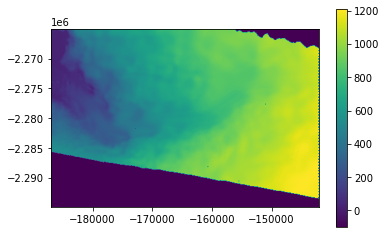

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4

file_path = os.path.join(project_folder,GC.region_name,'Elevation','Data',GC.region_name+' GLISTIN Elevation Grids.nc')
ds = nc4.Dataset(file_path)
x = ds.variables['x'][:]
y = ds.variables['y'][:]
dem = ds.variables['20170317'][:,:]

C = plt.imshow(dem,extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower')
plt.colorbar(C)

## Objective 2: A timeseries of velocity

For velocity, we can apply the same approach using CHANGES. For this example, we will use the site-specific InSAR maps of velocity available at [NSIDC](https://nsidc.org/data/nsidc-0481). Similar to previous example, we adjust the parameters of the init_object to activate the InSAR fields. Note that there are 984 velocity files for Jakobshavn after and this download will take up approxiomately 1 GB on your drive. If a smaller download is desired for testing, then the `max_number_of_measures_insar_files` parameter can be adjusted:

In [15]:
import datetime
GC.deactivate_all_sources()
GC.compile_velocity = True
GC.compile_measures_insar_data = True
GC.date1 = datetime.datetime(2016,1,1)
GC.date2 = datetime.datetime(2021,1,1)
#GC.max_number_of_measures_insar_files = 5 #optional parameter to just download a few files

With a quick switch of parameters, the module is ready to run:

In [16]:
GC.execute_velocity_and_elevation_compilations()

Creating velocity compilation for Jakobshavn
    Running compilation for the MEaSUREs InSAR data
        Found 2656 MEaSUREs InSAR files overlapping the domain
            Found 984 existing files - downloading 1672 files
        Stacking MEaSUREs InSAR data into a common grid
            Looking for velocity points in 20151223-20160103 (file 1 of 246)
              Looking for velocity points in TSX_W69.10N_23Dec15_03Jan16_10-05-50 (file 1 of 1)
              Found 62793.0 points
            Looking for velocity points in 20151224-20160104 (file 2 of 246)
              Looking for velocity points in TSX_W69.10N_24Dec15_04Jan16_20-41-38 (file 1 of 1)
              Found 65533.0 points
            Looking for velocity points in 20160103-20160114 (file 3 of 246)
              Looking for velocity points in TSX_W69.10N_03Jan16_14Jan16_10-05-50 (file 1 of 1)
              Found 63149.0 points
            Looking for velocity points in 20160114-20160125 (file 4 of 246)
              Looking

              Found 90101.0 points
            Looking for velocity points in 20160708-20160719 (file 40 of 246)
              Looking for velocity points in TSX_W69.10N_08Jul16_19Jul16_10-05-55 (file 1 of 1)
              Found 60701.0 points
            Looking for velocity points in 20160713-20160724 (file 41 of 246)
              Looking for velocity points in TSX_W68.60N_13Jul16_24Jul16_10-14-36 (file 1 of 1)
              Found 0.0 points
            Looking for velocity points in 20160715-20160726 (file 42 of 246)
              Looking for velocity points in TSX_W69.10N_15Jul16_26Jul16_20-33-09 (file 1 of 1)
              Found 90543.0 points
            Looking for velocity points in 20160719-20160730 (file 43 of 246)
              Looking for velocity points in TSX_W69.10N_19Jul16_30Jul16_10-05-55 (file 1 of 1)
              Found 60710.0 points
            Looking for velocity points in 20160721-20160801 (file 44 of 246)
              Looking for velocity points in TSX_W69.10

              Found 64407.0 points
            Looking for velocity points in 20161221-20170101 (file 80 of 246)
              Looking for velocity points in TSX_W69.10N_21Dec16_01Jan17_20-41-47 (file 1 of 1)
              Found 65785.0 points
            Looking for velocity points in 20161222-20170102 (file 81 of 246)
              Looking for velocity points in TSX_W69.10N_22Dec16_02Jan17_20-24-41 (file 1 of 1)
              Found 51176.0 points
            Looking for velocity points in 20161227-20170107 (file 82 of 246)
              Looking for velocity points in TSX_W69.10N_27Dec16_07Jan17_20-33-14 (file 1 of 1)
              Found 93638.0 points
            Looking for velocity points in 20161231-20170111 (file 83 of 246)
              Looking for velocity points in TSX_W69.10N_31Dec16_11Jan17_10-05-59 (file 1 of 1)
              Found 63629.0 points
            Looking for velocity points in 20170101-20170112 (file 84 of 246)
              Looking for velocity points in TSX_W6

              Found 125142.0 points
            Looking for velocity points in 20170630-20170711 (file 120 of 246)
              Looking for velocity points in TSX_W68.60N_30Jun17_11Jul17_10-14-43 (file 1 of 1)
              Found 0.0 points
            Looking for velocity points in 20170706-20170717 (file 121 of 246)
              Looking for velocity points in TSX_W69.10N_06Jul17_17Jul17_10-06-03 (file 1 of 1)
              Found 62037.0 points
            Looking for velocity points in 20170707-20170718 (file 122 of 246)
              Looking for velocity points in TSX_W69.10N_07Jul17_18Jul17_15-15-22 (file 1 of 1)
              Found 124771.0 points
            Looking for velocity points in 20170711-20170722 (file 123 of 246)
              Looking for velocity points in TSX_W68.60N_11Jul17_22Jul17_10-14-43 (file 1 of 1)
              Found 0.0 points
            Looking for velocity points in 20170717-20170728 (file 124 of 246)
              Looking for velocity points in TSX_W69

              Found 65390.0 points
            Looking for velocity points in 20180131-20180211 (file 160 of 246)
              Looking for velocity points in TSX_W69.10N_31Jan18_11Feb18_10-06-05 (file 1 of 1)
              Found 65219.0 points
            Looking for velocity points in 20180201-20180212 (file 161 of 246)
              Looking for velocity points in TSX_W69.10N_01Feb18_12Feb18_20-41-53 (file 1 of 1)
              Found 66538.0 points
            Looking for velocity points in 20180211-20180222 (file 162 of 246)
              Looking for velocity points in TSX_W69.10N_11Feb18_22Feb18_10-06-04 (file 1 of 1)
              Found 66349.0 points
            Looking for velocity points in 20180212-20180223 (file 163 of 246)
              Looking for velocity points in TSX_W69.10N_12Feb18_23Feb18_20-41-53 (file 1 of 1)
              Found 66384.0 points
            Looking for velocity points in 20180222-20180305 (file 164 of 246)
              Looking for velocity points in T

              Found 90071.0 points
            Looking for velocity points in 20180830-20180910 (file 200 of 246)
              Looking for velocity points in TSX_W69.10N_30Aug18_10Sep18_20-24-54 (file 1 of 1)
              Found 49739.0 points
            Looking for velocity points in 20180902-20180913 (file 201 of 246)
              Looking for velocity points in TSX_W68.60N_02Sep18_13Sep18_10-14-53 (file 1 of 1)
              Found 0.0 points
            Looking for velocity points in 20180904-20180915 (file 202 of 246)
              Looking for velocity points in TSX_W69.10N_04Sep18_15Sep18_20-33-27 (file 1 of 1)
              Found 91965.0 points
            Looking for velocity points in 20180909-20180920 (file 203 of 246)
              Looking for velocity points in TSX_W69.10N_09Sep18_20Sep18_09-49-03 (file 1 of 1)
              Found 93640.0 points
            Looking for velocity points in 20180915-20180926 (file 204 of 246)
              Looking for velocity points in TSX_W

              Found 63520.0 points
            Looking for velocity points in 20190929-20191010 (file 240 of 246)
              Looking for velocity points in TSX_W69.10N_29Sep19_10Oct19_20-42-10 (file 1 of 1)
              Found 63797.0 points
            Looking for velocity points in 20191010-20191021 (file 241 of 246)
              Looking for velocity points in TSX_W69.10N_10Oct19_21Oct19_20-42-10 (file 1 of 1)
              Found 64622.0 points
            Looking for velocity points in 20191021-20191112 (file 242 of 246)
              Looking for velocity points in TSX_W69.10N_21Oct19_12Nov19_20-42-10 (file 1 of 1)
              Found 63163.0 points
            Looking for velocity points in 20191112-20191123 (file 243 of 246)
              Looking for velocity points in TSX_W69.10N_12Nov19_23Nov19_20-42-11 (file 1 of 1)
              Found 65470.0 points
            Looking for velocity points in 20191123-20191204 (file 244 of 246)
              Looking for velocity points in T

Similar to the grids for elevation, this routine created a stack of velocity grids in the `project_folder`. We can make a quick plot of the velocity on Jakobshavn using these grids:

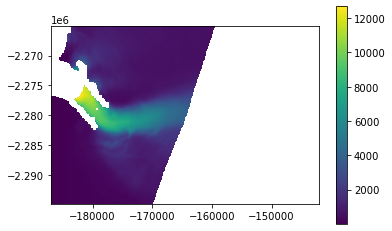

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4

file_path = os.path.join(project_folder,GC.region_name,'Velocity','Data',GC.region_name+' MEaSUREs InSAR Velocity Grids.nc')
ds = nc4.Dataset(file_path)
date_groups = list(ds.groups.keys())
V = ds.groups[date_groups[0]].variables['V'][:,:]
V[V==-99999]=np.nan
x = ds.variables['x'][:]
y = ds.variables['y'][:]

C = plt.imshow(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower')
plt.colorbar(C)

## Objective 3: Plot tiemseries of the elevation and speed on Jakobshavn

To create a quick timeseries of elevation and speed on Jakobshavn, we will average the fields in a 1 km by 1 km box on the main trunk:

/Applications/anaconda3/envs/changes/lib/python3.8/site-packages/numpy/ma/core.py:5243: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
/Applications/anaconda3/envs/changes/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


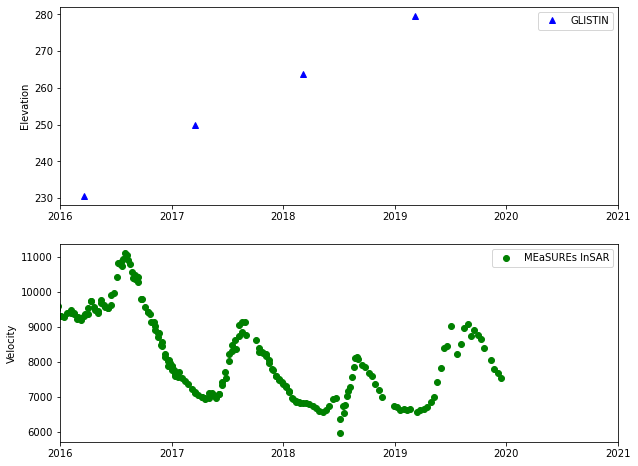

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import netCDF4 as nc4

# define the plotting region
min_x = -179500
min_y = -2280000
max_x = min_x + 1000
max_y = min_y +1000

# get the elevation timeseries
file_path = os.path.join(project_folder,GC.region_name,'Elevation','Data',GC.region_name+' GLISTIN Elevation Grids.nc')
ds = nc4.Dataset(file_path)
x = ds.variables['x'][:]
x_indices = np.logical_and(x>=min_x,x<=max_x)
y = ds.variables['y'][:]
y_indices = np.logical_and(y>=min_y,y<=max_y)
dates = list(ds.variables.keys())
dates.pop(dates.index('x'))
dates.pop(dates.index('y'))
elevation_times = []
elevation_values = []
for date in dates:
    time = datetime(int(date[:4]),int(date[4:6]),int(date[6:8]))
    elevation_times.append(time)
    dem = ds.variables[date][:,:]
    dem = dem[:,x_indices]
    dem = dem[y_indices,:]
    elevation_values.append(np.mean(dem[dem!=-99]))

# get the elevation timeseries
file_path = os.path.join(project_folder,GC.region_name,'Velocity','Data',GC.region_name+' MEaSUREs InSAR Velocity Grids.nc')
ds = nc4.Dataset(file_path)
x = ds.variables['x'][:]
x_indices = np.logical_and(x>=min_x,x<=max_x)
y = ds.variables['y'][:]
y_indices = np.logical_and(y>=min_y,y<=max_y)
date_pairs = list(ds.groups.keys())
velocity_times = []
velocity_values = []
for date_pair in date_pairs:
    date1 = date_pair.split('-')[0]
    time1 = datetime(int(date1[:4]),int(date1[4:6]),int(date1[6:8]))
#     date2 = date_pair.split('-')[1]
#     time2 = datetime(int(date2[:4]),int(date2[4:6]),int(date2[6:8]))
#     time = (time1+time2)/2
    velocity_times.append(time1)
    vel = ds.groups[date_pair].variables['V'][:,:]
    vel = vel[:,x_indices]
    vel = vel[y_indices,:]
    velocity_values.append(np.mean(vel[vel!=-99999]))
    
    
fig = plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(elevation_times,elevation_values,'b^',label='GLISTIN')
plt.gca().set_xlim([datetime(2016,1,1),datetime(2021,1,1)])
plt.ylabel('Elevation')
plt.legend()

plt.subplot(2,1,2)
plt.plot(velocity_times,velocity_values,'go',label='MEaSUREs InSAR')
plt.gca().set_xlim([datetime(2016,1,1),datetime(2021,1,1)])
plt.ylabel('Velocity')
plt.legend()



The plots above demonstrate the thickening and slowdown of Jakobshavn Isbrae that started in 2016. Note that there are many more sources of elevation and velocity available out there, and can be accessed through the CHANGES module.